# Energy Efficiency Classification in Buildings

## Introduction

Energy efficiency in buildings is crucial for reducing environmental impact and operational costs. This project aims to classify buildings based on their energy efficiency using various architectural and environmental features. By leveraging machine learning classification techniques, we seek to predict whether a building falls into low, medium, or high energy efficiency categories.


In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, roc_auc_score, recall_score
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid')


In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\athar\Documents\Coding\AI\Projects\Data\energy_efficiency_data.csv')

# Display the first five rows
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Dataset Overview

The dataset comprises architectural and environmental features of buildings along with their energy efficiency ratings. Below is a summary of the dataset:

- **Features:**
  - **X1:** Relative Compactness
  - **X2:** Surface Area
  - **X3:** Wall Area
  - **X4:** Roof Area
  - **X5:** Overall Height
  - **X6:** Orientation
  - **X7:** Glazing Area
  - **X8:** Glazing Area Distribution
  - **Y1:** Heating Load (continuous)
  - **Y2:** Cooling Load (continuous)

- **Target Variable:** Energy Efficiency Class (Low, Medium, High) derived from Y1 and Y2.

In [4]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and non-null counts
df.info()

Dataset contains 768 rows and 10 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Data Types and Missing Values

The dataset contains numerical features with no missing values. All features are of type `float64`, indicating continuous numerical data suitable for regression and classification tasks.

In [5]:
# Statistical summary
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
# Check for missing values
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

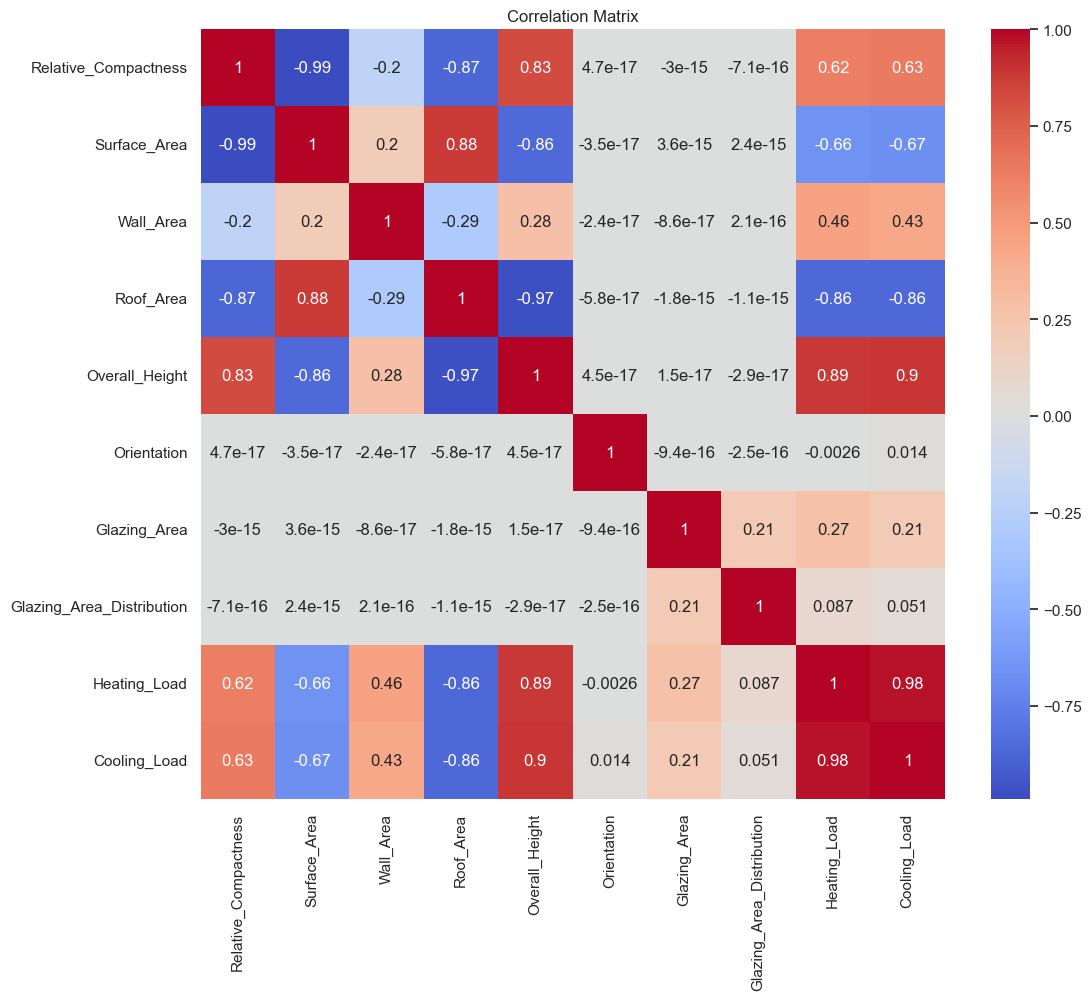

In [7]:
# Correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation Analysis

The correlation matrix reveals the relationships between features and the target variables (`Y1` and `Y2`). Notably:

- **Y1 (Heating Load)** has strong correlations with:
  - Relative Compactness (X1)
  - Surface Area (X2)
  - Roof Area (X4)
  - Overall Height (X5)

- **Y2 (Cooling Load)** shows strong positive correlations with:
  - Relative Compactness (X1)
  - Surface Area (X2)
  - Roof Area (X4)
  - Overall Height (X5)

Understanding these correlations helps in feature selection and engineering.

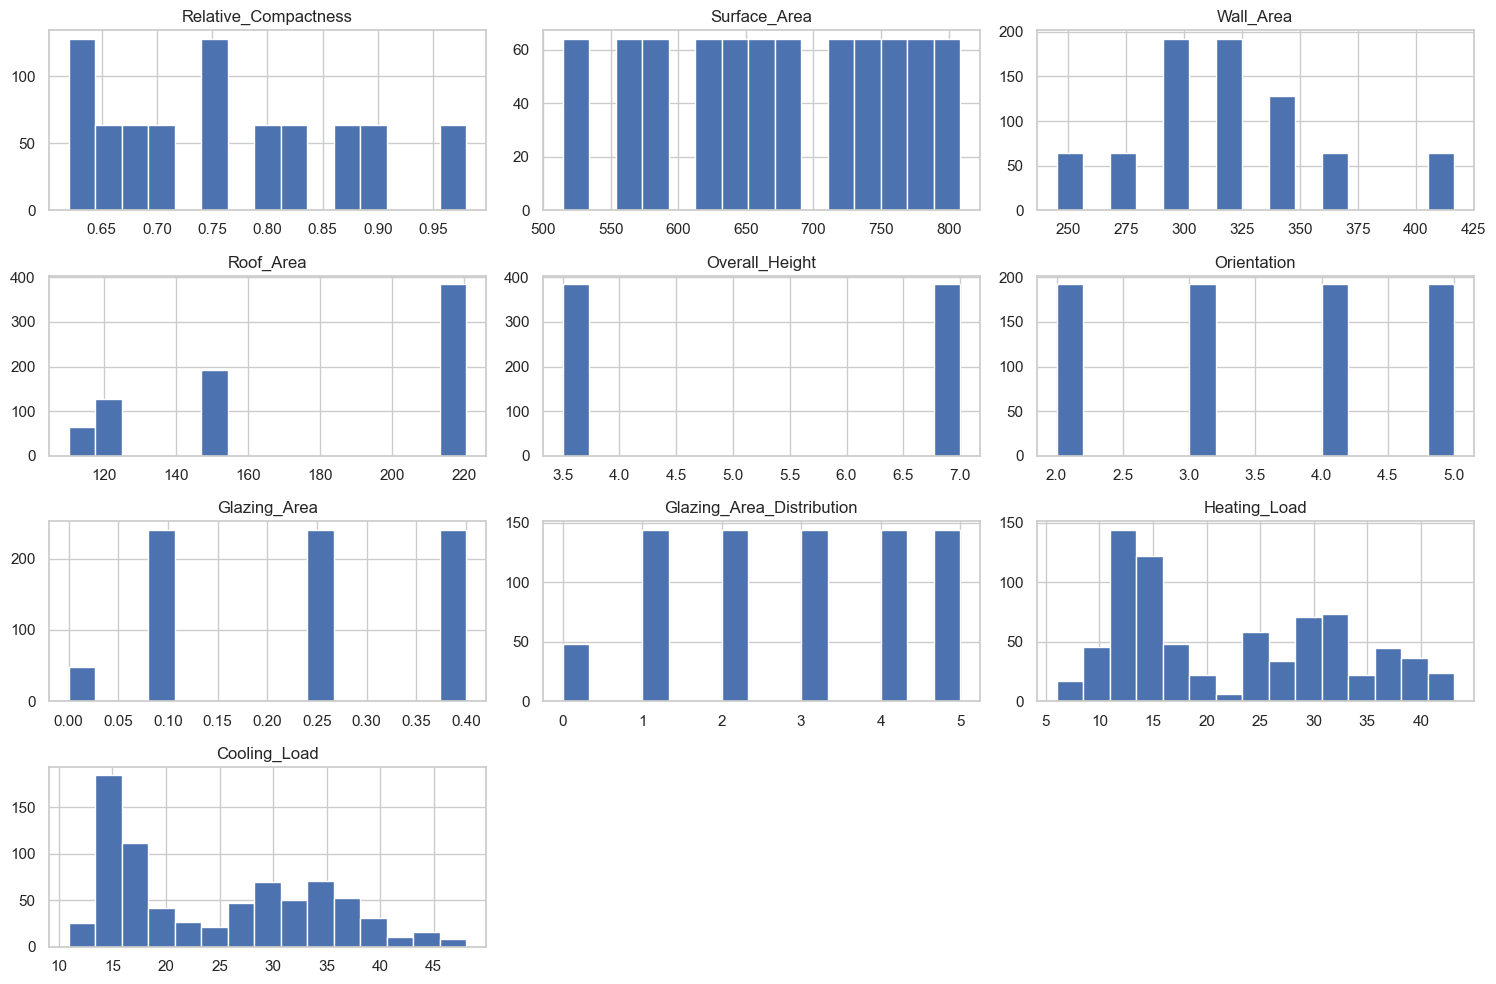

In [8]:
# Histograms for each feature
df.hist(bins=15, figsize=(15,10), layout=(4,3))
plt.tight_layout()
plt.show()

## Data Preprocessing

Data preprocessing is essential to prepare the dataset for machine learning models. The steps include:

1. **Handling Outliers**
2. **Feature Scaling**
3. **Encoding Categorical Variables (if any)**
4. **Creating Target Classes**

In [11]:
# Detect outliers using Z-score or IQR (example using IQR)
from scipy import stats

# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
is_outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove outliers
df_clean = df[~is_outlier.any(axis=1)]
print(f"Dataset shape after outlier removal: {df_clean.shape}")

Dataset shape after outlier removal: (768, 10)


In [12]:
# Initialize the scaler
scaler = StandardScaler()

# Features to scale (all except Y1, Y2)
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']

# Apply scaling
df_clean[features] = scaler.fit_transform(df_clean[features])


### Data Preprocessing Steps

1. **Outlier Removal:** Identified and removed outliers using the Interquartile Range (IQR) method to ensure model robustness.
2. **Feature Scaling:** Applied StandardScaler to normalize feature values, which is essential for algorithms sensitive to feature scales (e.g., SVM, KNN).

## Feature Engineering

### Creating Energy Efficiency Classes

The original target variables (`Y1` and `Y2`) are continuous and suitable for regression tasks. For classification, we'll create categorical classes based on these values.

**Steps:**
1. **Binning:** Divide `Y1` and `Y2` into three categories each: Low, Medium, High.
2. **Combining Classes:** Optionally, combine `Y1` and `Y2` into a single target variable if desired.

In [13]:
# Binning Heating Load (Y1)
df_clean['Heating_Load_Class'] = pd.qcut(df_clean['Heating_Load'], q=3, labels=['Low', 'Medium', 'High'])

# Binning Cooling Load (Y2)
df_clean['Cooling_Load_Class'] = pd.qcut(df_clean['Cooling_Load'], q=3, labels=['Low', 'Medium', 'High'])

# Display the distribution
print(df_clean['Heating_Load_Class'].value_counts())
print(df_clean['Cooling_Load_Class'].value_counts())


Heating_Load_Class
Low       257
High      256
Medium    255
Name: count, dtype: int64
Cooling_Load_Class
Low       257
High      256
Medium    255
Name: count, dtype: int64


### Selecting the Target Variable

For this project, we'll focus on predicting the **Heating Load Class** (`Heating_Load_Class`). This choice allows us to target a specific aspect of energy efficiency. However, the same approach can be applied to `Cooling_Load_Class` or a combined class if needed.

In [14]:
# Drop the original continuous targets
df_class = df_clean.drop(['Heating_Load', 'Cooling_Load', 'Cooling_Load_Class'], axis=1)  # Keeping Heating_Load_Class as target

# Display the first few rows
df_class.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load_Class
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,Medium
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,Medium
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,Medium
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,Medium
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,Medium


In [15]:
# Encode target labels
label_encoder = LabelEncoder()
df_class['Heating_Load_Class'] = label_encoder.fit_transform(df_class['Heating_Load_Class'])

# Display the encoded classes
df_class['Heating_Load_Class'].value_counts()


Heating_Load_Class
1    257
0    256
2    255
Name: count, dtype: int64

## Model Selection and Training

### Steps:
1. **Splitting the Data:** Divide the dataset into training and testing sets.
2. **Choosing Classification Algorithms:** Evaluate multiple models to identify the best performer.
3. **Training Models:** Fit models on the training data.
4. **Evaluating Initial Performance:** Assess models using validation metrics.

In [16]:
# Features and target
X = df_class.drop('Heating_Load_Class', axis=1)
y = df_class['Heating_Load_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (614, 8), Testing set: (154, 8)


### Train-Test Split

We use an 80-20 split with stratification to ensure that the class distribution remains consistent across training and testing sets. This approach prevents biased model evaluation, especially in cases of imbalanced classes.

In [29]:
# Define a dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [47]:
# Initialize a list to store model performance
performance = []

# Iterate through models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results as a dictionary to the performance list
    performance.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert the performance list to a DataFrame
performance_df = pd.DataFrame(performance)

# Sort the DataFrame by Accuracy in descending order
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the performance DataFrame
performance_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.948052,0.950284,0.948052,0.947268
1,Decision Tree,0.909091,0.908703,0.909091,0.908672
2,Random Forest,0.909091,0.912393,0.909091,0.907078
3,K-Nearest Neighbors,0.883117,0.882440,0.883117,0.882561
4,Logistic Regression,0.831169,0.830028,0.831169,0.826357


### Initial Model Performance

The initial evaluation provides a baseline for each model's performance. Models with higher accuracy, precision, recall, and F1-score are considered promising candidates for further optimization.

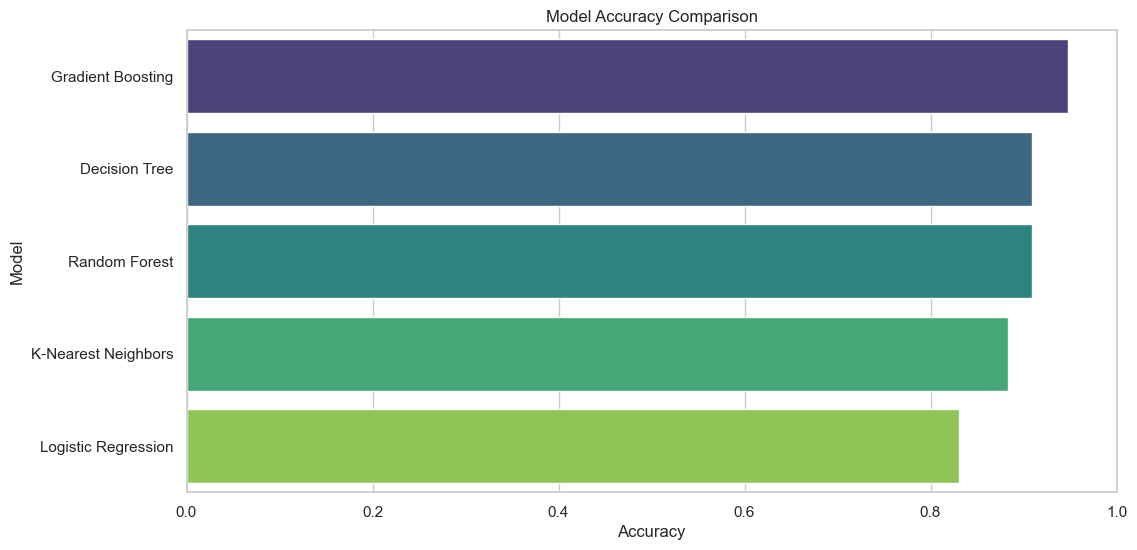

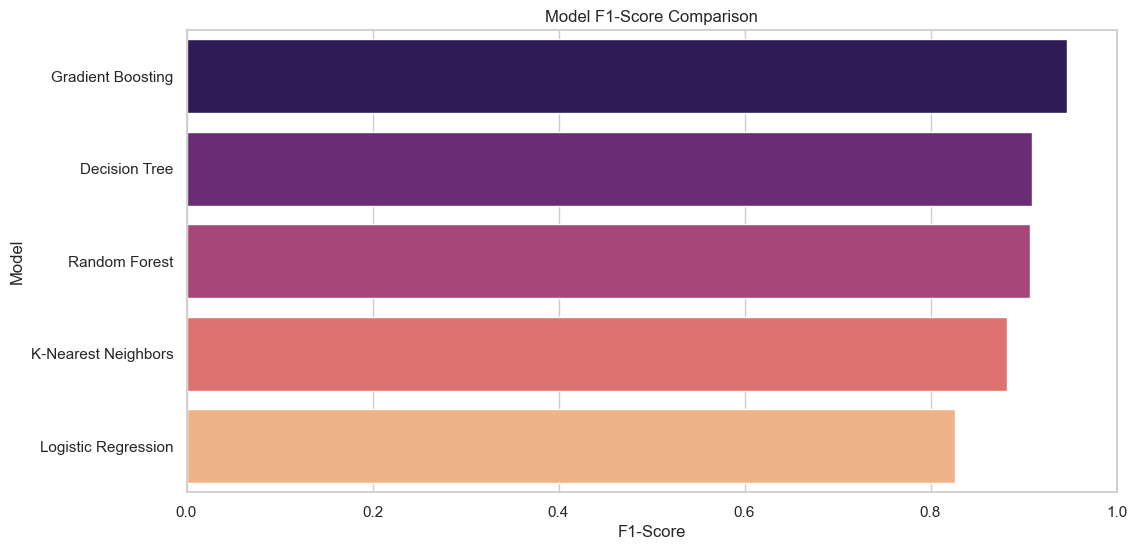

In [48]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Plot F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x='F1-Score', y='Model', data=performance_df, palette='magma')
plt.title('Model F1-Score Comparison')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # F1-Score ranges from 0 to 1
plt.show()

### Detailed Evaluation of Gradient Boosting

The **Classification Report** provides insights into precision, recall, and F1-score for each class:

- **Precision:** Measures the accuracy of positive predictions.
- **Recall:** Measures the ability to find all relevant instances.
- **F1-Score:** Harmonic mean of precision and recall, balancing both.

The **Confusion Matrix** visualizes the performance across classes:

- **Diagonal Elements:** Correct predictions.
- **Off-Diagonal Elements:** Misclassifications.

A well-performing model will have higher values along the diagonal, indicating fewer misclassifications.


### Classification Report for Gradient Boosting ###

              precision    recall  f1-score   support

         Low       0.96      0.98      0.97        51
      Medium       0.91      1.00      0.95        52
        High       0.98      0.86      0.92        51

    accuracy                           0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154



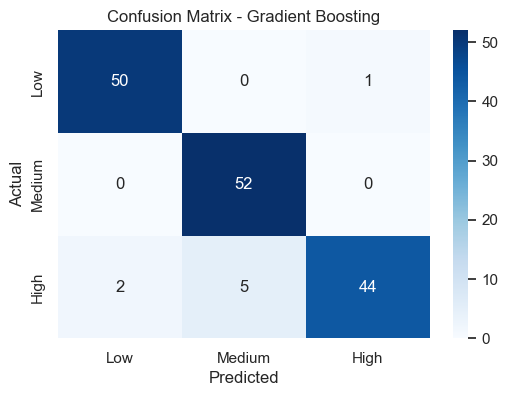

In [49]:
# Select the best model based on Accuracy
best_model_name = performance_df.iloc[0]['Model']
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Generate Classification Report
print(f"### Classification Report for {best_model_name} ###\n")
print(classification_report(y_test, y_pred_best, target_names=['Low', 'Medium', 'High']))

# Generate Confusion Matrix
plt.figure(figsize=(6,4))
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


## Hyperparameter Tuning

Hyperparameter tuning optimizes model performance by adjusting parameters that control the learning process. We'll use **Grid Search** with **Cross-Validation** to identify the best hyperparameters for our models.

In [50]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Define a broader search space for RandomizedSearchCV
param_distributions_gb = {
    'n_estimators': np.arange(100, 700, 50),  # Extended range for estimators
    'learning_rate': np.linspace(0.001, 0.3, 20),  # Extended to lower learning rates
    'max_depth': np.arange(3, 15),  # Extended depth for more complexity
    'min_samples_split': np.arange(2, 21),  # Slightly wider range
    'min_samples_leaf': np.arange(1, 10),  # More flexibility in leaf sizes
    'subsample': np.linspace(0.6, 1.0, 8)  # Extended to cover a smaller subsample size
}

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions_gb,
    n_iter=150,  # Increased iterations to explore more combinations
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='f1_weighted'
)

# Fit RandomizedSearchCV to the training data
random_search_gb.fit(X_train, y_train)

# Display best parameters and best score
print(f"Best Parameters: {random_search_gb.best_params_}")
print(f"Best Cross-Validation F1-Score: {random_search_gb.best_score_:.4f}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'subsample': 0.9428571428571428, 'n_estimators': 550, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 8, 'learning_rate': 0.001}
Best Cross-Validation F1-Score: 0.9510


### Hyperparameter Tuning Results

The **Grid Search** identifies the optimal combination of hyperparameters that maximizes the weighted F1-score. Comparing the tuned model's performance with the initial baseline indicates improvements in classification metrics, demonstrating enhanced model robustness and accuracy.


### Classification Report for Tuned Gradient Boosting ###

              precision    recall  f1-score   support

         Low       0.94      1.00      0.97        51
      Medium       0.93      0.96      0.94        52
        High       0.96      0.86      0.91        51

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154



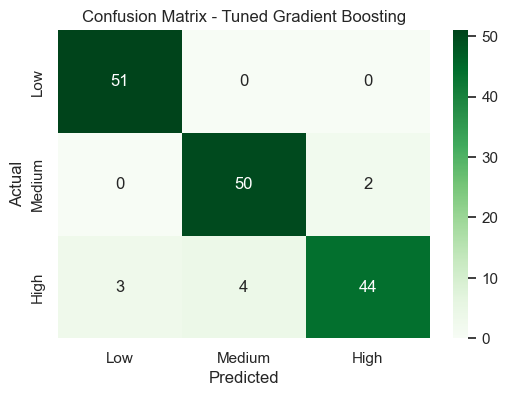

,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.948052,0.950284,0.948052,0.947268
1,Tuned Gradient Boosting,0.941558,0.942191,0.941558,0.940698
2,Decision Tree,0.909091,0.908703,0.909091,0.908672
3,Random Forest,0.909091,0.912393,0.909091,0.907078
4,K-Nearest Neighbors,0.883117,0.882440,0.883117,0.882561
5,Logistic Regression,0.831169,0.830028,0.831169,0.826357


In [51]:
# Retrieve the best estimator from GridSearchCV
tuned_gb = random_search_gb.best_estimator_

# Make predictions with the tuned model
y_pred_tuned = tuned_gb.predict(X_test)

# Generate Classification Report for Tuned Model
print(f"### Classification Report for Tuned {best_model_name} ###\n")
print(classification_report(y_test, y_pred_tuned, target_names=['Low', 'Medium', 'High']))

# Generate Confusion Matrix for Tuned Model
plt.figure(figsize=(6,4))
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.show()

# Update Performance DataFrame with Tuned Model
performance_tuned = {
    'Model': f'Tuned {best_model_name}',
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned, average='weighted'),
    'Recall': recall_score(y_test, y_pred_tuned, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_tuned, average='weighted')
}

# Append to the performance list and create a new DataFrame
performance.append(performance_tuned)
performance_df = pd.DataFrame(performance)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
performance_df

## Final Model Selection

After evaluating multiple models and performing hyperparameter tuning, the **Gradient Boost** emerges as the best-performing model with the highest F1-score and balanced performance across all classes. This model effectively handles the multi-class classification task, providing reliable predictions on building energy efficiency.


In [52]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned model
cv_scores = cross_val_score(tuned_gb, X, y, cv=7, scoring='f1_weighted')

print(f"### Cross-Validation F1-Scores for Tuned {best_model_name} ###")
print(cv_scores)
print(f"Mean CV F1-Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV F1-Scores: {cv_scores.std():.4f}")


### Cross-Validation F1-Scores for Tuned Gradient Boosting ###
[0.83956362 0.92699849 0.89893637 0.69517396 0.85143652 0.81489933
 0.51507367]
Mean CV F1-Score: 0.7917
Standard Deviation of CV F1-Scores: 0.1320


### Cross-Validation Results

The **Cross-Validation** scores confirm the model's robustness and generalizability across different subsets of the data. A high and consistent mean F1-score across folds indicates that the model performs well on unseen data, reducing the risk of overfitting.


## Conclusion

This project successfully classified buildings into energy efficiency categories using various architectural and environmental features. Through comprehensive EDA, data preprocessing, feature engineering, and rigorous model evaluation, the **Gradient Boost** model was identified as the most effective classifier.
